In [819]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [820]:
df= pd.read_csv("Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [821]:
df=df.drop("Serial No.", axis=1)

In [822]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [823]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [824]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [825]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [826]:
#from sklearn.preprocessing import StandardScaler,MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaler1= StandardScaler()
#df["GRE Score"] = scaler.fit_transform(df[["GRE Score"]])
#df["TOEFL Score"] = scaler.fit_transform(df[["TOEFL Score"]])

In [827]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


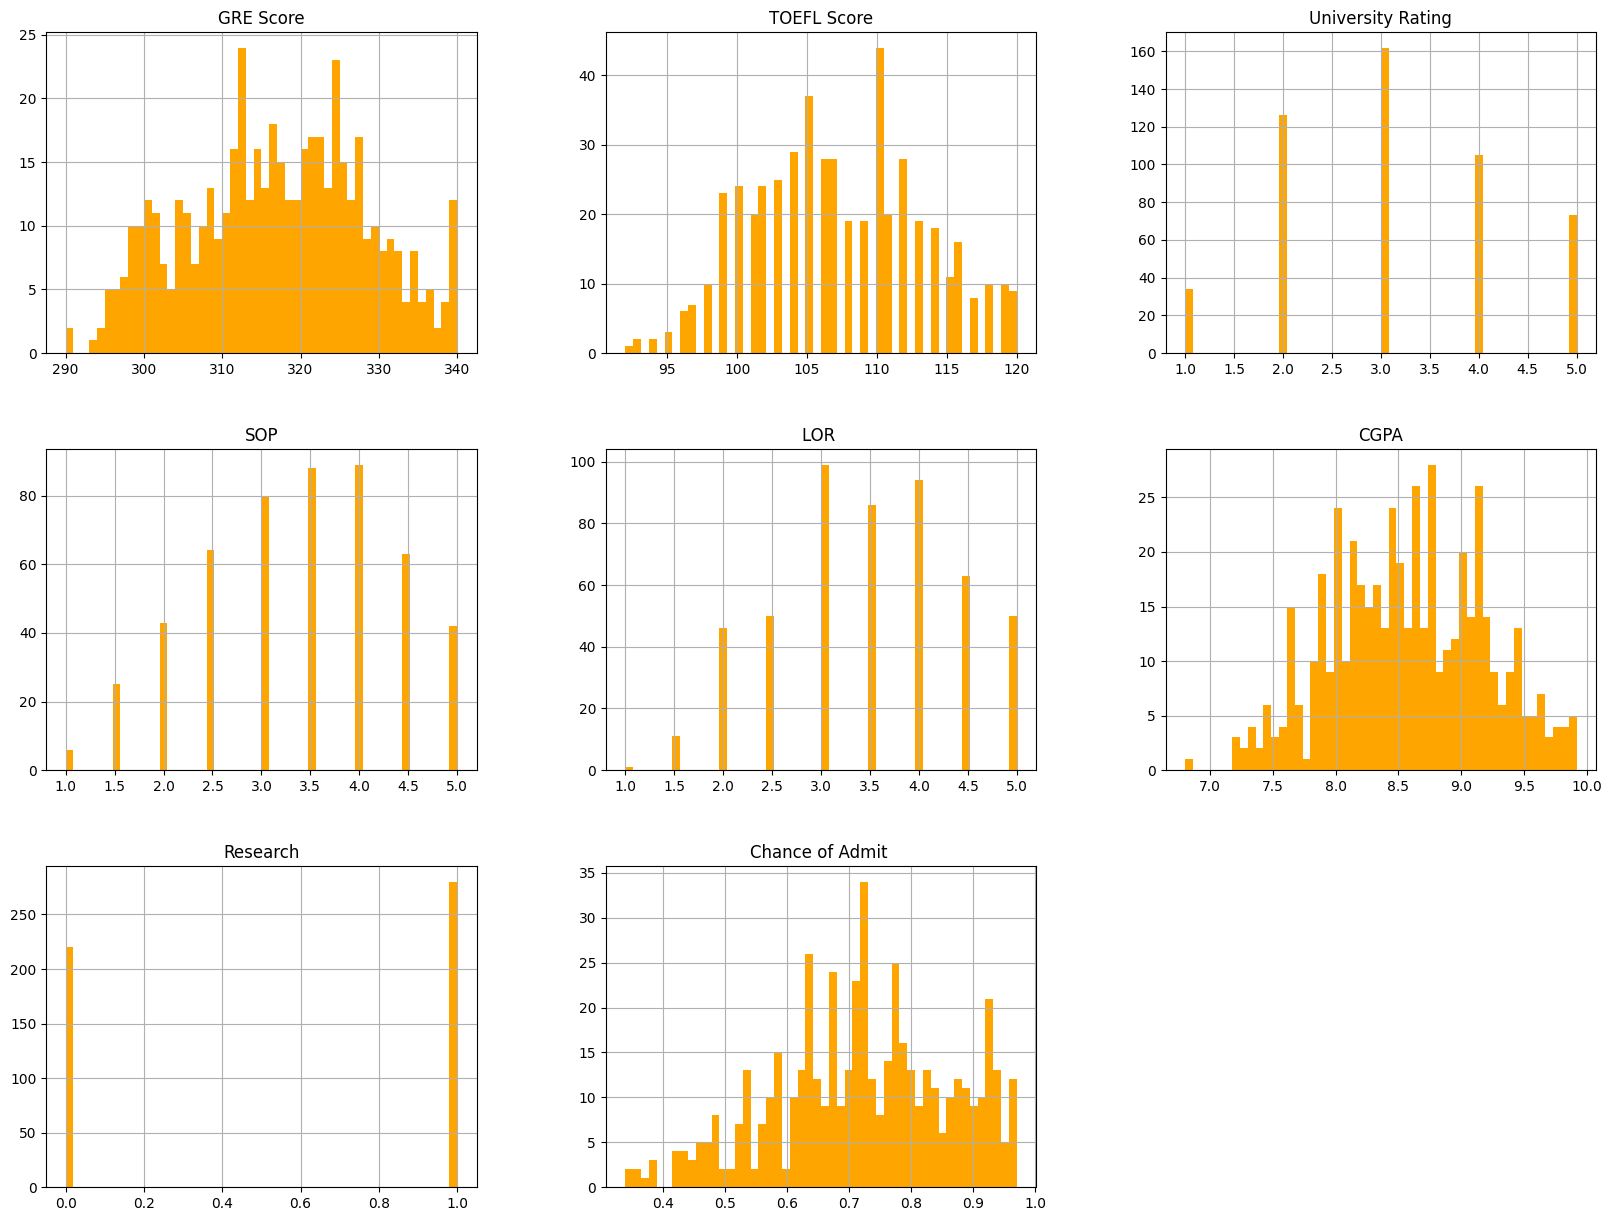

In [828]:
df.hist(bins=50, figsize=(20,15),color="orange")
plt.show()

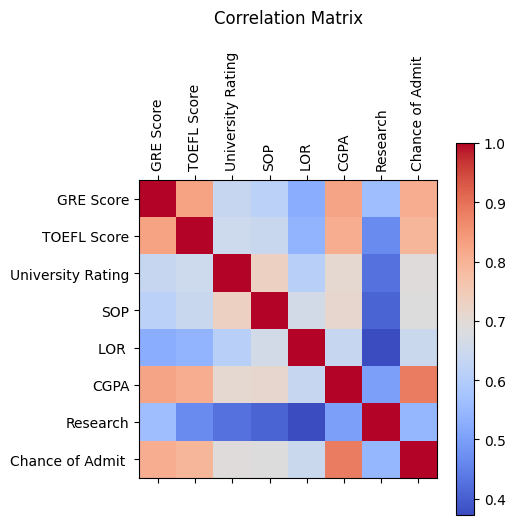

In [829]:
correlation_matrix = df.corr()
plt.matshow(correlation_matrix, cmap="coolwarm")
plt.colorbar()

# Add labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns,rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.title("Correlation Matrix", pad=20)
plt.show()

In [830]:
from sklearn.model_selection import train_test_split

In [831]:
X= df.iloc[:,0:-1]
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [832]:
Y=df.iloc[:,-1]
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [833]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)

In [834]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(400, 7)
(100, 7)
(400,)
(100,)


In [835]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor


In [836]:
lr= GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
lr.fit(X_train,Y_train)

GradientBoostingRegressor(random_state=42)

In [837]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
361,334,116,4,4.0,3.5,9.54,1
73,314,108,4,4.5,4.0,9.04,1
374,315,105,2,2.0,2.5,7.65,0
155,312,109,3,3.0,3.0,8.69,0
104,326,112,3,3.5,3.0,9.05,1
...,...,...,...,...,...,...,...
347,299,94,1,1.0,1.0,7.34,0
86,315,106,3,4.5,3.5,8.42,0
75,329,114,2,2.0,4.0,8.56,1
438,318,110,1,2.5,3.5,8.54,1


In [838]:
p=[[321,110,2,4,3.5,9.54,1]]
y=lr.predict(p)
y

c:\Users\saket\anaconda3\envs\mlproj\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([0.88907789])

In [839]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score

In [840]:
def eval_metrics(actual,pred):
    rmse=np.sqrt(mean_squared_error(actual,pred))
    mae= mean_absolute_error(actual,pred)
    r2=r2_score(actual,pred)

    return rmse,mae,r2

In [841]:
predicted_value=lr.predict(X_test)
predicted_value

array([0.93779231, 0.78480948, 0.63158043, 0.70608007, 0.78124581,
       0.87594509, 0.489937  , 0.63480594, 0.83400454, 0.78682278,
       0.71607691, 0.70667334, 0.68987795, 0.93026981, 0.84396264,
       0.56665721, 0.83867857, 0.57834429, 0.53555301, 0.53337139,
       0.67645103, 0.54224351, 0.72495059, 0.77240658, 0.76392221,
       0.63058235, 0.93997383, 0.85039256, 0.68089245, 0.73793321,
       0.55216718, 0.73044351, 0.54470851, 0.88424571, 0.63641097,
       0.7420842 , 0.55182571, 0.94994428, 0.6688452 , 0.68584566,
       0.9519824 , 0.56852823, 0.68727767, 0.8479505 , 0.94142913,
       0.59899988, 0.93910134, 0.81151839, 0.75766877, 0.92543372,
       0.90608965, 0.55170012, 0.68520181, 0.48270697, 0.94852115,
       0.65257954, 0.95038014, 0.73449953, 0.64051549, 0.43067254,
       0.60685353, 0.69497223, 0.60884914, 0.56871922, 0.4761094 ,
       0.60500335, 0.88808395, 0.90275397, 0.66778618, 0.73558486,
       0.60977952, 0.76491011, 0.69975908, 0.62283993, 0.55742

In [842]:
(rmse,mae,r2)=eval_metrics(Y_test,predicted_value)

In [843]:
print("rmse",rmse)
print("mae",mae)
print("r2",r2)

rmse 0.06679737394051563
mae 0.04636480047901155
r2 0.7818147107408764
